# Importing the libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Importing the dataset and analysing

In [2]:
data = pd.read_csv('regression_data.csv')
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [3]:
data.shape

(21597, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [5]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [6]:
# bedrooms column
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [7]:
# bathrooms column
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

In [8]:
# floors column
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [9]:
# waterfront column
data['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [10]:
# view column
data['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [11]:
# grade column
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

# Cleaning the dataset

In [12]:
# Checking for null values
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [13]:
#Checking for duplicates
data = data.drop_duplicates()
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [14]:
#Dropping some columns
data = data.drop(['id', 'date','sqft_living','sqft_lot'], axis = 1)
data

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [15]:
#Checking for outliers for a few columns and cleaning them

In [16]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [17]:
data = remove_outliers(data, threshold=1.5, in_columns=['sqft_living15','sqft_lot15','sqft_basement','sqft_above']) 
data

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


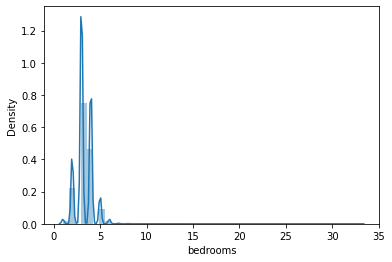

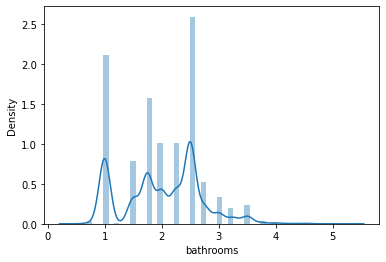

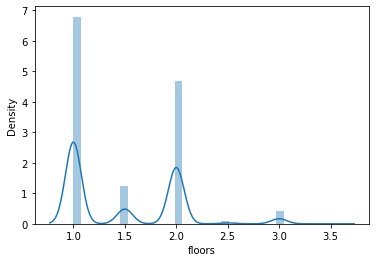

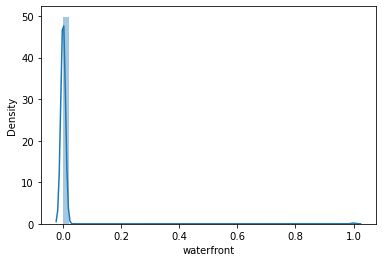

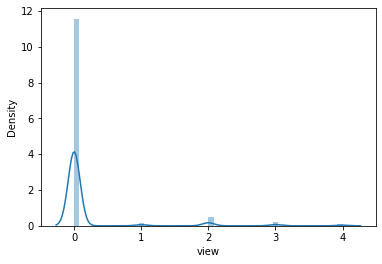

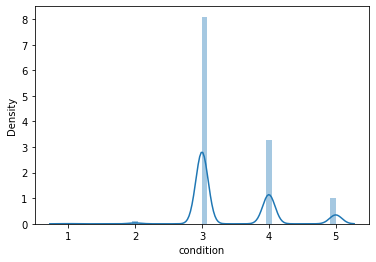

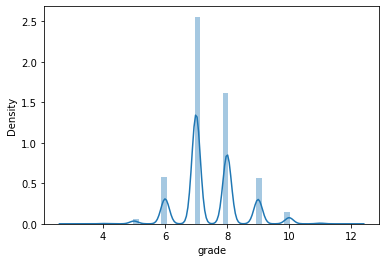

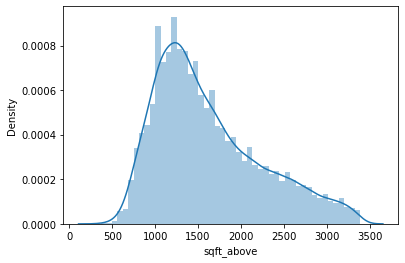

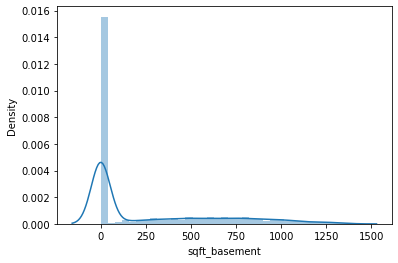

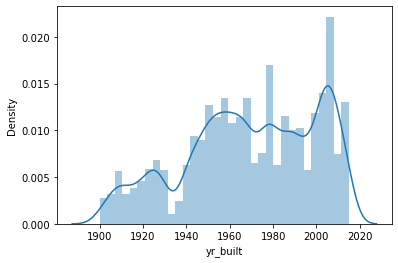

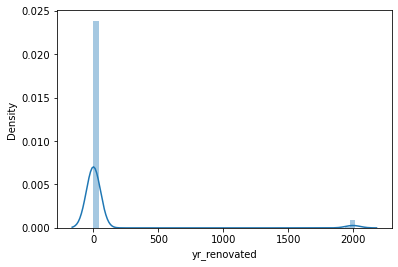

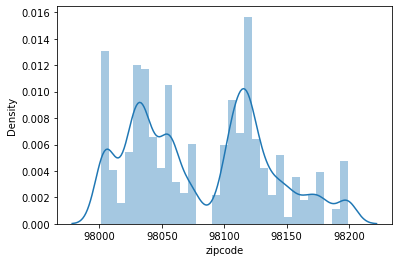

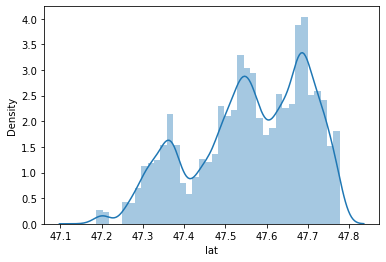

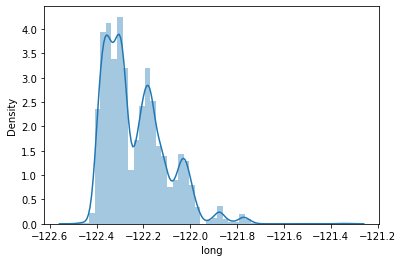

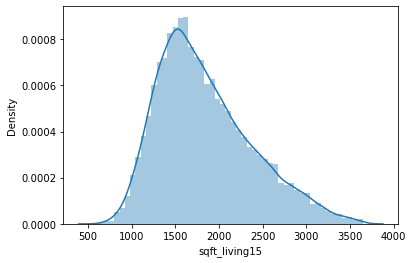

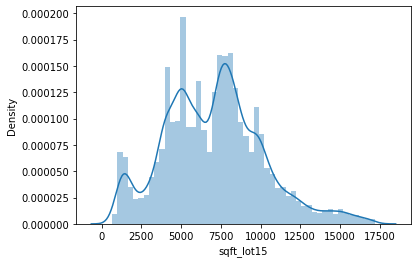

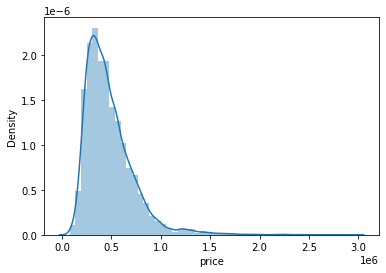

In [18]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

# Checking for correlation and dropping some columns (if necessary)

In [19]:
corr_data = data.select_dtypes([np.number])
correlations_matrix1 = corr_data.corr()
correlations_matrix1

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.468231,0.149625,-0.022912,0.035025,0.034263,0.295506,0.469838,0.275981,0.134679,0.024741,-0.147578,-0.040969,0.126393,0.357337,0.156719,0.248229
bathrooms,0.468231,1.000000,0.515995,0.021062,0.113360,-0.125088,0.600216,0.621071,0.236208,0.521946,0.054328,-0.194360,-0.011024,0.209975,0.504734,-0.054748,0.413157
floors,0.149625,0.515995,1.000000,0.017825,0.019626,-0.263352,0.467647,0.540392,-0.269091,0.494559,0.014618,-0.052283,0.029377,0.109478,0.256670,-0.366559,0.255166
waterfront,-0.022912,0.021062,0.017825,1.000000,0.329596,0.006910,0.035390,0.027251,0.023445,-0.019520,0.062657,0.035925,-0.010692,-0.010025,0.047604,0.065414,0.161712
view,0.035025,0.113360,0.019626,0.329596,1.000000,0.029482,0.178711,0.090388,0.192916,-0.079321,0.099085,0.125184,0.022982,-0.102420,0.219965,0.072593,0.327025
condition,0.034263,-0.125088,-0.263352,0.006910,0.029482,1.000000,-0.150245,-0.160790,0.180397,-0.356574,-0.061377,-0.003940,0.003213,-0.091844,-0.095523,0.124269,0.066483
grade,0.295506,0.600216,0.467647,0.035390,0.178711,-0.150245,1.000000,0.668499,0.099010,0.450222,0.020967,-0.155320,0.094993,0.150685,0.624871,0.027314,0.600465
sqft_above,0.469838,0.621071,0.540392,0.027251,0.090388,-0.160790,0.668499,1.000000,-0.161878,0.431257,0.025990,-0.266181,-0.061908,0.338659,0.685038,0.133756,0.465761
sqft_basement,0.275981,0.236208,-0.269091,0.023445,0.192916,0.180397,0.099010,-0.161878,1.000000,-0.171829,0.067042,0.128723,0.135424,-0.192410,0.133247,0.072829,0.276250
yr_built,0.134679,0.521946,0.494559,-0.019520,-0.079321,-0.356574,0.450222,0.431257,-0.171829,1.000000,-0.221638,-0.341725,-0.178333,0.404609,0.309657,-0.039707,-0.030988


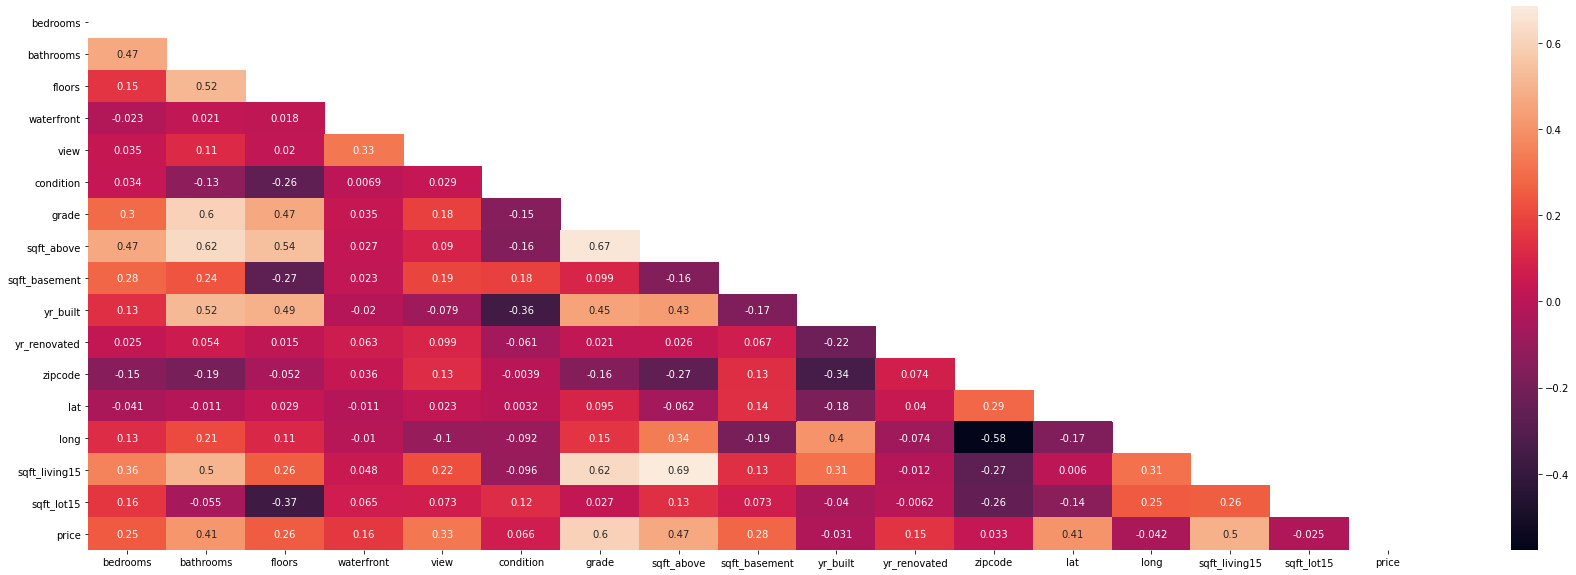

In [20]:
mask = np.zeros_like(correlations_matrix1)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(30, 10))
figure = sns.heatmap(correlations_matrix1, mask=mask, annot=True)
plt.savefig('hmap.png', dpi=400)
plt.show()

In [21]:
data = data.drop(['condition','yr_built','yr_renovated','zipcode','lat','long','sqft_lot15'], axis = 1)
data

,bedrooms,bathrooms,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,price
0,3,1.00,1.0,0,0,7,1180,0,1340,221900
1,3,2.25,2.0,0,0,7,2170,400,1690,538000
2,2,1.00,1.0,0,0,6,770,0,2720,180000
3,4,3.00,1.0,0,0,7,1050,910,1360,604000
4,3,2.00,1.0,0,0,8,1680,0,1800,510000
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,8,1530,0,1530,360000
21593,4,2.50,2.0,0,0,8,2310,0,1830,400000
21594,2,0.75,2.0,0,0,7,1020,0,1020,402101
21595,3,2.50,2.0,0,0,8,1600,0,1410,400000


# Converting some columns' type from numerical to categorical

In [22]:
data = data.astype({"bedrooms": object, "bathrooms": object, "floors":object, "waterfront":object, "view":object, "grade":object})

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18205 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       18205 non-null  object
 1   bathrooms      18205 non-null  object
 2   floors         18205 non-null  object
 3   waterfront     18205 non-null  object
 4   view           18205 non-null  object
 5   grade          18205 non-null  object
 6   sqft_above     18205 non-null  int64 
 7   sqft_basement  18205 non-null  int64 
 8   sqft_living15  18205 non-null  int64 
 9   price          18205 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.5+ MB


# Separating numerical and categorical columns for pre-processing

In [24]:
y = data['price']
X = data.drop(['price'], axis=1)

In [25]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [26]:
X_num

,sqft_above,sqft_basement,sqft_living15
0,1180,0,1340
1,2170,400,1690
2,770,0,2720
3,1050,910,1360
4,1680,0,1800
...,...,...,...
21592,1530,0,1530
21593,2310,0,1830
21594,1020,0,1020
21595,1600,0,1410


In [27]:
X_cat

,bedrooms,bathrooms,floors,waterfront,view,grade
0,3,1.0,1.0,0,0,7
1,3,2.25,2.0,0,0,7
2,2,1.0,1.0,0,0,6
3,4,3.0,1.0,0,0,7
4,3,2.0,1.0,0,0,8
...,...,...,...,...,...,...
21592,3,2.5,3.0,0,0,8
21593,4,2.5,2.0,0,0,8
21594,2,0.75,2.0,0,0,7
21595,3,2.5,2.0,0,0,8


# Encoding categorical columns

In [28]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [29]:
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [30]:
X = np.concatenate([X_num, encoded], axis=1)
X

array([[1180.,    0., 1340., ...,    0.,    0.,    0.],
       [2170.,  400., 1690., ...,    0.,    0.,    0.],
       [ 770.,    0., 2720., ...,    0.,    0.,    0.],
       ...,
       [1020.,    0., 1020., ...,    0.,    0.,    0.],
       [1600.,    0., 1410., ...,    0.,    0.,    0.],
       [1020.,    0., 1020., ...,    0.,    0.,    0.]])

# Fitting the model

## using non-normalized and one-hot encoded data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
predictions  = model.predict(X_test)
predictions.shape

(5462,)

In [34]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.5365206112661647, 167923.54249396228, 28198316123.721554)

## using normalized and one-hot encoded data

In [43]:
#transformer = Normalizer().fit(X_num)
#x_normalized = transformer.transform(X_num)
#print(x_normalized.shape)

NameError: name 'Standardizer' is not defined

In [47]:
transformer = StandardScaler()
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized

array([[-0.70388692, -0.68795402, -0.92884411],
       [ 0.88582259,  0.37910891, -0.28190467],
       [-1.36225146, -0.68795402,  1.62194568],
       ...,
       [-0.96080967, -0.68795402, -1.52033159],
       [-0.0294647 , -0.68795402, -0.79945622],
       [-0.96080967, -0.68795402, -1.52033159]])

In [59]:
x_standardized.shape

(18205, 3)

In [48]:
X2 = np.concatenate([x_standardized, encoded], axis=1)
X2

array([[-0.70388692, -0.68795402, -0.92884411, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88582259,  0.37910891, -0.28190467, ...,  0.        ,
         0.        ,  0.        ],
       [-1.36225146, -0.68795402,  1.62194568, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.96080967, -0.68795402, -1.52033159, ...,  0.        ,
         0.        ,  0.        ],
       [-0.0294647 , -0.68795402, -0.79945622, ...,  0.        ,
         0.        ,  0.        ],
       [-0.96080967, -0.68795402, -1.52033159, ...,  0.        ,
         0.        ,  0.        ]])

In [49]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X2_train,y_train)

LinearRegression()

In [53]:
predictions2  = model.predict(X2_test)
predictions2.shape

(5462,)

In [54]:
r2_score(y_test, predictions2), mean_squared_error(y_test, predictions2, squared=False), mean_squared_error(y_test, predictions2)

(-5.150283238532386e+21, 1.7701575898757504e+16, 3.1334578929947253e+32)

In [55]:
y_train

6319     325000
10964    742500
5063     479990
12461    500000
13373    246000
          ...  
13400    122000
14218    815000
6439     286285
1037     380000
18763    235000
Name: price, Length: 12743, dtype: int64

In [57]:
y_test

8448     315000
11176    442250
20433    294000
8544     224000
14494    239900
          ...  
8230     250000
17725    325000
11916    498500
2041     219950
4660     405000
Name: price, Length: 5462, dtype: int64

In [58]:
predictions2

array([408867.10301715, 476313.40341662, 369519.74637053, ...,
       554711.14519959, 321301.29727785, 342753.66054734])

In [56]:
X2_train

array([[ 0.25957339, -0.68795402,  1.67739764, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61284217,  2.24646902,  0.53139063, ...,  0.        ,
         0.        ,  0.        ],
       [-0.36667581,  0.96599351, -0.28190467, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.71994459,  1.4728484 , -0.42977654, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61284217, -0.68795402,  1.08591015, ...,  0.        ,
         0.        ,  0.        ],
       [-1.52282818, -0.68795402,  0.2171629 , ...,  0.        ,
         0.        ,  0.        ]])

In [44]:
x_normalized

array([[0.66088037, 0.        , 0.75049127],
       [0.7807473 , 0.14391655, 0.60804743],
       [0.27238426, 0.        , 0.96218855],
       ...,
       [0.70710678, 0.        , 0.70710678],
       [0.75024823, 0.        , 0.66115625],
       [0.70710678, 0.        , 0.70710678]])

In [37]:
X1 = np.concatenate([x_normalized, encoded], axis=1)
X1

array([[0.66088037, 0.        , 0.75049127, ..., 0.        , 0.        ,
        0.        ],
       [0.7807473 , 0.14391655, 0.60804743, ..., 0.        , 0.        ,
        0.        ],
       [0.27238426, 0.        , 0.96218855, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.70710678, 0.        , 0.70710678, ..., 0.        , 0.        ,
        0.        ],
       [0.75024823, 0.        , 0.66115625, ..., 0.        , 0.        ,
        0.        ],
       [0.70710678, 0.        , 0.70710678, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [39]:
model = LinearRegression()
model.fit(X1_train,y_train)

LinearRegression()

In [40]:
predictions  = model.predict(X1_test)
predictions.shape

(5462,)

In [41]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(-3.3082838120835e+21, 1.4187234743209856e+16, 2.0127762965894083e+32)

In [69]:
transformer2 = StandardScaler()
transformer2.fit(data)

x_standardized2 = transformer2.transform(data)
x_standardized2

array([[-0.32607358, -1.46286972, -0.87252251, ..., -0.68795402,
        -0.92884411, -1.03822106],
       [-0.32607358,  0.34486468,  0.9675322 , ...,  0.37910891,
        -0.28190467,  0.24193794],
       [-1.44315476, -1.46286972, -0.87252251, ..., -0.68795402,
         1.62194568, -1.20790996],
       ...,
       [-1.44315476, -1.8244166 ,  0.9675322 , ..., -0.68795402,
        -1.52033159, -0.30843323],
       [-0.32607358,  0.70641156,  0.9675322 , ..., -0.68795402,
        -0.79945622, -0.31694198],
       [-1.44315476, -1.8244166 ,  0.9675322 , ..., -0.68795402,
        -1.52033159, -0.62068106]])

In [70]:
x_standardized2.shape

(18205, 10)

array([[-0.32607358, -1.46286972, -0.87252251, ...,  0.        ,
         0.        ,  0.        ],
       [-0.32607358,  0.34486468,  0.9675322 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.44315476, -1.46286972, -0.87252251, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.44315476, -1.8244166 ,  0.9675322 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.32607358,  0.70641156,  0.9675322 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.44315476, -1.8244166 ,  0.9675322 , ...,  0.        ,
         0.        ,  0.        ]])

In [72]:
x_standardized2_train, x_standardized2_test, y_train, y_test = train_test_split(x_standardized2, y, test_size=0.3, random_state=42)

In [73]:
model = LinearRegression()
model.fit(x_standardized2_train,y_train)

LinearRegression()

In [74]:
predictions2  = model.predict(x_standardized2_test)
predictions2.shape

(5462,)

In [75]:
r2_score(y_test, predictions2), mean_squared_error(y_test, predictions2, squared=False), mean_squared_error(y_test, predictions2)

(1.0, 1.918381901868428e-10, 3.680189121416327e-20)